# Ames Housing Data Analysis (Train) - 1st Attempt

# Problem Statement

Dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

Using this dataset, we build a regression model to predict the selling prices of houses.

In [1]:
# Import the necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set row display option
pd.set_option('display.max_rows' , 100)
# pd.set_option('display.max_columns' , 100)

# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the Data

In [2]:
train = pd.read_csv('../dataset/train.csv')

In [3]:
# Look at the data
train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

# Following Data Documentation

Following advice in the special note of the data documentation, we will remove any houses with more than 4000 square feet from the data set.

In [5]:
train.loc[(train['Gr Liv Area'] > 4000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [6]:
train.drop(index=train.loc[train['Gr Liv Area'] > 4000].index , inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2049 non-null   int64  
 1   PID              2049 non-null   int64  
 2   MS SubClass      2049 non-null   int64  
 3   MS Zoning        2049 non-null   object 
 4   Lot Frontage     1719 non-null   float64
 5   Lot Area         2049 non-null   int64  
 6   Street           2049 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2049 non-null   object 
 9   Land Contour     2049 non-null   object 
 10  Utilities        2049 non-null   object 
 11  Lot Config       2049 non-null   object 
 12  Land Slope       2049 non-null   object 
 13  Neighborhood     2049 non-null   object 
 14  Condition 1      2049 non-null   object 
 15  Condition 2      2049 non-null   object 
 16  Bldg Type        2049 non-null   object 
 17  House Style   

# Data Cleaning

Check for Null Values.

In [8]:
# Check for Null Values
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1909
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

Drop those columns with more than 1000 Null values. i.e.
`Alley`, `Fireplace Qu`, `Pool QC`, `Fence` & `Misc Feature`

In [9]:
train.drop(columns=['Alley' , 'Fireplace Qu' , 'Pool QC' , 'Fence' , 'Misc Feature'],axis=1,inplace=True)

In [10]:
# Check for nulls after dropping 5 columns
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF 

Filling up those missing values, with less than 1000 null:

- Replace those numerical values by its mode

- Replace those non-numerical values by the maximum occurencce 

In [11]:
# Check those numerical null values
(train.isnull().sum() > 0) & (train.dtypes != object)

Id                 False
PID                False
MS SubClass        False
MS Zoning          False
Lot Frontage        True
Lot Area           False
Street             False
Lot Shape          False
Land Contour       False
Utilities          False
Lot Config         False
Land Slope         False
Neighborhood       False
Condition 1        False
Condition 2        False
Bldg Type          False
House Style        False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Roof Style         False
Roof Matl          False
Exterior 1st       False
Exterior 2nd       False
Mas Vnr Type       False
Mas Vnr Area        True
Exter Qual         False
Exter Cond         False
Foundation         False
Bsmt Qual          False
Bsmt Cond          False
Bsmt Exposure      False
BsmtFin Type 1     False
BsmtFin SF 1        True
BsmtFin Type 2     False
BsmtFin SF 2        True
Bsmt Unf SF         True
Total Bsmt SF       True
Heating            False


In [12]:
# Replace those numerical values by its mode
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].mode()[0])
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].mode()[0])
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(train['BsmtFin SF 1'].mean())
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(train['BsmtFin SF 2'].mode()[0])
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(train['Bsmt Unf SF'].mode()[0])
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(train['Total Bsmt SF'].mean())
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].mode()[0])
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(train['Bsmt Half Bath'].mean())
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].mode()[0])
train['Garage Cars'] = train['Garage Cars'].fillna(train['Garage Cars'].mode()[0])
train['Garage Area'] = train['Garage Area'].fillna(train['Garage Area'].mode()[0])

In [13]:
# Check those non-numerical null values
(train.isnull().sum() > 0) & (train.dtypes == object)

Id                 False
PID                False
MS SubClass        False
MS Zoning          False
Lot Frontage       False
Lot Area           False
Street             False
Lot Shape          False
Land Contour       False
Utilities          False
Lot Config         False
Land Slope         False
Neighborhood       False
Condition 1        False
Condition 2        False
Bldg Type          False
House Style        False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Roof Style         False
Roof Matl          False
Exterior 1st       False
Exterior 2nd       False
Mas Vnr Type        True
Mas Vnr Area       False
Exter Qual         False
Exter Cond         False
Foundation         False
Bsmt Qual           True
Bsmt Cond           True
Bsmt Exposure       True
BsmtFin Type 1      True
BsmtFin SF 1       False
BsmtFin Type 2      True
BsmtFin SF 2       False
Bsmt Unf SF        False
Total Bsmt SF      False
Heating            False


In [14]:
# Check the number of elements inside 'Mas Vnr Type'
train.loc[:,'Mas Vnr Type'].value_counts(dropna=False)

None       1218
BrkFace     630
Stone       166
NaN          22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [15]:
# Replace the missing values with None (as this is the maximum)
train.loc[:,'Mas Vnr Type'] = train.loc[:,'Mas Vnr Type'].fillna('None')
train.loc[:,'Mas Vnr Type'].value_counts(dropna=False)

None       1240
BrkFace     630
Stone       166
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [16]:
# Check the number of elements inside 'Bsmt Qual'
train.loc[:,'Bsmt Qual'].value_counts(dropna=False)

TA     887
Gd     864
Ex     182
Fa      60
NaN     55
Po       1
Name: Bsmt Qual, dtype: int64

In [17]:
# Replace the missing values with TA (as this is the maximum)
train.loc[:,'Bsmt Qual'] = train.loc[:,'Bsmt Qual'].fillna('TA')
train.loc[:,'Bsmt Qual'].value_counts(dropna=False)

TA    942
Gd    864
Ex    182
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [18]:
# Check the number of elements inside 'Bsmt Cond'
train.loc[:,'Bsmt Cond'].value_counts(dropna=False)

TA     1832
Gd       89
Fa       65
NaN      55
Po        5
Ex        3
Name: Bsmt Cond, dtype: int64

In [19]:
# Replace the missing values with TA (as this is the maximum)
train.loc[:,'Bsmt Cond'] = train.loc[:,'Bsmt Cond'].fillna('TA')
train.loc[:,'Bsmt Cond'].value_counts(dropna=False)

TA    1887
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [20]:
# Check the number of elements inside 'Bsmt Exposure'
train.loc[:,'Bsmt Exposure'].value_counts(dropna=False)

No     1339
Av      288
Gd      201
Mn      163
NaN      58
Name: Bsmt Exposure, dtype: int64

In [21]:
# Replace the missing values with No (as this is the maximum)
train.loc[:,'Bsmt Exposure'] = train.loc[:,'Bsmt Exposure'].fillna('No')
train.loc[:,'Bsmt Exposure'].value_counts(dropna=False)

No    1397
Av     288
Gd     201
Mn     163
Name: Bsmt Exposure, dtype: int64

In [22]:
# Check the number of elements inside 'Bsmt Type 1'
train.loc[:,'BsmtFin Type 1'].value_counts(dropna=False)

GLQ    613
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NaN     55
Name: BsmtFin Type 1, dtype: int64

In [23]:
# Replace the missing values with GLQ (as this is the maximum)
train.loc[:,'BsmtFin Type 1'] = train.loc[:,'BsmtFin Type 1'].fillna('GLQ')
train.loc[:,'BsmtFin Type 1'].value_counts(dropna=False)

GLQ    668
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [24]:
# Check the number of elements inside 'Bsmt Type 2'
train.loc[:,'BsmtFin Type 2'].value_counts(dropna=False)

Unf    1747
Rec      80
LwQ      60
NaN      56
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [25]:
# Replace the missing values with Unf (as this is the maximum)
train.loc[:,'BsmtFin Type 2'] = train.loc[:,'BsmtFin Type 2'].fillna('Unf')
train.loc[:,'BsmtFin Type 2'].value_counts(dropna=False)

Unf    1803
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [26]:
# Check the number of elements inside 'Garage Type'
train.loc[:,'Garage Type'].value_counts(dropna=False)

Attchd     1211
Detchd      536
BuiltIn     132
NaN         113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [27]:
# Replace the missing values with Attchd (as this is the maximum)
train.loc[:,'Garage Type'] = train.loc[:,'Garage Type'].fillna('Attchd')
train.loc[:,'Garage Type'].value_counts(dropna=False)

Attchd     1324
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [28]:
# Check the number of elements inside 'Garage Finish'
train.loc[:,'Garage Finish'].value_counts(dropna=False)

Unf    849
RFn    579
Fin    507
NaN    114
Name: Garage Finish, dtype: int64

In [29]:
# Replace the missing values with Unf (as this is the maximum)
train.loc[:,'Garage Finish'] = train.loc[:,'Garage Finish'].fillna('Attchd')
train.loc[:,'Garage Finish'].value_counts(dropna=False)

Unf       849
RFn       579
Fin       507
Attchd    114
Name: Garage Finish, dtype: int64

In [30]:
# Check the number of elements inside 'Garage Quall'
train.loc[:,'Garage Qual'].value_counts(dropna=False)

TA     1830
NaN     114
Fa       82
Gd       18
Ex        3
Po        2
Name: Garage Qual, dtype: int64

In [31]:
# Replace the missing values with TA (as this is the maximum)
train.loc[:,'Garage Qual'] = train.loc[:,'Garage Qual'].fillna('TA')
train.loc[:,'Garage Qual'].value_counts(dropna=False)

TA    1944
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [32]:
# Check the number of elements inside 'Garage Cond'
train.loc[:,'Garage Cond'].value_counts(dropna=False)

TA     1866
NaN     114
Fa       47
Gd       12
Po        8
Ex        2
Name: Garage Cond, dtype: int64

In [33]:
# Replace the missing values with TA (as this is the maximum)
train.loc[:,'Garage Cond'] = train.loc[:,'Garage Cond'].fillna('TA')
train.loc[:,'Garage Cond'].value_counts(dropna=False)

TA    1980
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [34]:
# Check if there is anymore null values
train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

After confirmation, all the Null values of the data have been cleaned and replaced.

Save my clean dataframe.

In [35]:
train.to_csv('../dataset/train_clean.csv')

# EDA

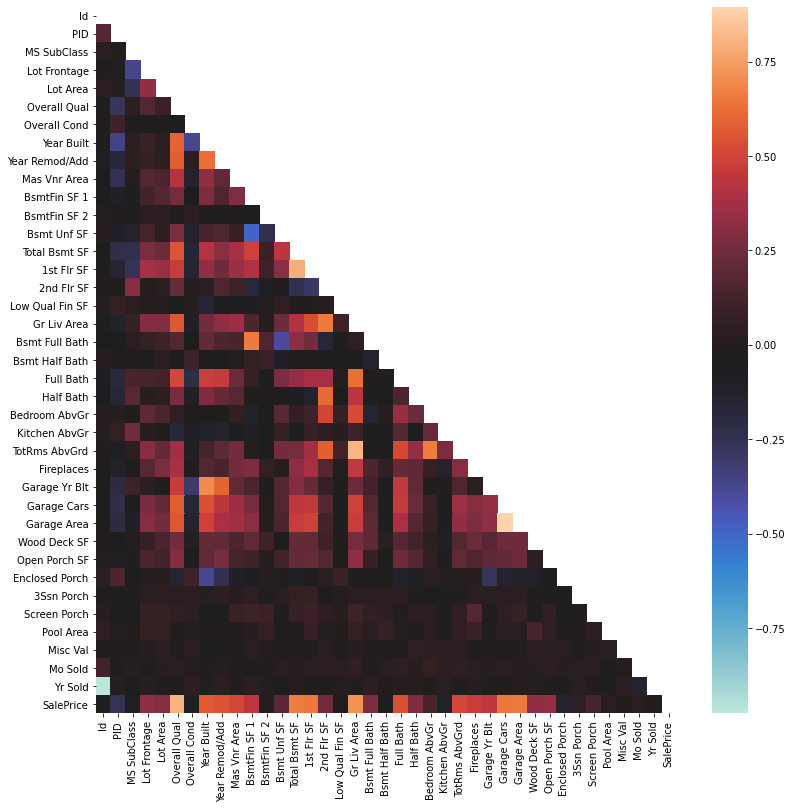

In [36]:
plt.figure(figsize=(13, 13))
sns.heatmap(train.corr() , cmap='icefire',mask=np.triu(train.corr()))

In [37]:
sp = train.corr()[['SalePrice']]

In [38]:
sp.sort_values(by='SalePrice')

,SalePrice
PID,-0.255068
Enclosed Porch,-0.135713
Kitchen AbvGr,-0.125472
Overall Cond,-0.097093
MS SubClass,-0.087331
Id,-0.051416
Bsmt Half Bath,-0.045534
Low Qual Fin SF,-0.041608
Yr Sold,-0.015174
Misc Val,-0.010323


# Our goal is to predict price, list variables that i think will predict price in an SLR model.

Based on the correlation between SalePrice and various variables, i will choose those variables of correlation values > 0.15 to be in an SLR model.

In [39]:
X = train[['Overall Qual' , 'Gr Liv Area' , 'Total Bsmt SF' , 'Garage Area' , 
          'Garage Cars' , '1st Flr SF' , 'Year Built' , 'Year Remod/Add' ,
          'Full Bath' , 'Mas Vnr Area' , 'TotRms AbvGrd' , 'Fireplaces' ,
          'Garage Yr Blt' , 'BsmtFin SF 1' , 'Open Porch SF' , 'Lot Frontage' ,
          'Wood Deck SF' , 'Lot Area' , 'Bsmt Full Bath' , 'Half Bath' ,
          '2nd Flr SF' , 'Bsmt Unf SF']]

In [40]:
y = train['SalePrice']

# Use Linear Regression to check how well is our model

In [41]:
lr = LinearRegression()

In [42]:
# Fit Linear Regression of our model
lr.fit(X , y)

LinearRegression()

In [43]:
# Intepret the intercept and the slope
lr.intercept_

-1365863.7917197617

In [44]:
lr.coef_

array([ 1.77666757e+04,  2.28025880e+01,  2.60818251e+01,  3.11409050e+01,
       -3.85757899e+02,  3.44152331e+01,  1.62626466e+02,  3.62714101e+02,
       -7.26217674e+03,  3.61054582e+01, -2.60253239e+02,  4.78048441e+03,
        1.28326432e+02,  1.69944161e+01,  1.94461284e+01,  1.89561344e+02,
        1.28096608e+01,  7.78035520e-01,  4.42428618e+02, -2.37061305e+03,
        3.02502925e+01, -6.73086284e+00])

In [45]:
{X.columns[i]: lr.coef_[i] for i in range(len(X.columns))}

{'Overall Qual': 17766.67567759717,
 'Gr Liv Area': 22.802587957524533,
 'Total Bsmt SF': 26.081825117947908,
 'Garage Area': 31.140905016104284,
 'Garage Cars': -385.75789878488035,
 '1st Flr SF': 34.415233061157124,
 'Year Built': 162.6264663347236,
 'Year Remod/Add': 362.7141008222888,
 'Full Bath': -7262.17674470332,
 'Mas Vnr Area': 36.10545824229463,
 'TotRms AbvGrd': -260.253239429915,
 'Fireplaces': 4780.484412416761,
 'Garage Yr Blt': 128.3264316589132,
 'BsmtFin SF 1': 16.99441608053929,
 'Open Porch SF': 19.446128382581502,
 'Lot Frontage': 189.56134382228572,
 'Wood Deck SF': 12.809660759255852,
 'Lot Area': 0.7780355196316029,
 'Bsmt Full Bath': 442.428618329141,
 'Half Bath': -2370.6130469044797,
 '2nd Flr SF': 30.250292531900506,
 'Bsmt Unf SF': -6.730862841135487}

From the Linear Regression model, we can see that the `Lot Area` is insignificant, we can construct a new model without that variablle.

In [46]:
X1 = train[['Overall Qual' , 'Gr Liv Area' , 'Total Bsmt SF' , 'Garage Area' , 
          'Garage Cars' , '1st Flr SF' , 'Year Built' , 'Year Remod/Add' ,
          'Full Bath' , 'Mas Vnr Area' , 'TotRms AbvGrd' , 'Fireplaces' ,
          'Garage Yr Blt' , 'BsmtFin SF 1' , 'Open Porch SF' , 'Lot Frontage' ,
          'Wood Deck SF' , 'Bsmt Full Bath' , 'Half Bath' , '2nd Flr SF' ,
          'Bsmt Unf SF']]

In [47]:
y1 = train['SalePrice']

Check the new model and its residual.

In [48]:
lr.fit(X1 , y1)

LinearRegression()

In [49]:
lr.coef_

array([ 1.69522299e+04,  2.31756489e+01,  2.53165679e+01,  3.38411009e+01,
       -4.25149556e+02,  3.88596131e+01,  1.52596463e+02,  3.73675834e+02,
       -7.25476331e+03,  3.64557841e+01, -4.56087188e+02,  5.88605738e+03,
        1.18742676e+02,  1.75953681e+01,  2.12734978e+01,  2.36372537e+02,
        1.51012899e+01,  5.34203427e+02, -1.94917524e+03,  3.14947917e+01,
       -6.34316880e+00])

In [50]:
lr.intercept_

-1346187.623585484

In [51]:
{X1.columns[i]: lr.coef_[i] for i in range(len(X1.columns))}

{'Overall Qual': 16952.229892290496,
 'Gr Liv Area': 23.175648941822807,
 'Total Bsmt SF': 25.316567883765252,
 'Garage Area': 33.841100928584915,
 'Garage Cars': -425.14955574896237,
 '1st Flr SF': 38.859613093683194,
 'Year Built': 152.5964631699754,
 'Year Remod/Add': 373.6758336826882,
 'Full Bath': -7254.763311089386,
 'Mas Vnr Area': 36.45578409632047,
 'TotRms AbvGrd': -456.0871884821164,
 'Fireplaces': 5886.057378149156,
 'Garage Yr Blt': 118.74267564066054,
 'BsmtFin SF 1': 17.595368077086295,
 'Open Porch SF': 21.273497791414613,
 'Lot Frontage': 236.37253689648054,
 'Wood Deck SF': 15.101289890909733,
 'Bsmt Full Bath': 534.2034270555177,
 'Half Bath': -1949.1752381812648,
 '2nd Flr SF': 31.494791712947837,
 'Bsmt Unf SF': -6.343168799327595}

# Using the new model, calculate and plot the residuals

In [53]:
predictions = lr.predict(X1)
len(predictions)

2049

In [54]:
# calculate residuals
residuals = y - predictions
residuals

0      -44807.078871
1      -16656.766779
2      -28669.807275
3       37524.538869
4        -939.788024
            ...     
2046    17620.944158
2047     2419.650728
2048    22555.550896
2049    20281.514767
2050   -15834.141049
Name: SalePrice, Length: 2049, dtype: float64

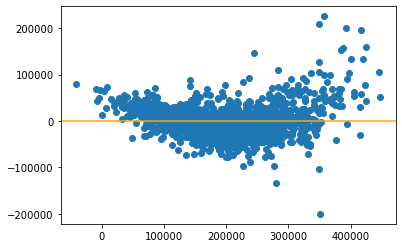

In [55]:
plt.scatter(predictions , residuals)
plt.axhline(0 , color='orange')